# **<span style="color: RED;">THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU</span>**

## **<span style="color: red;">1. VIẾT CHƯƠNG TRÌNH XỬ LÍ ĐIỂM ẢNH</span>**

## 1.1 Biến đổi cường độ điểm ảnh

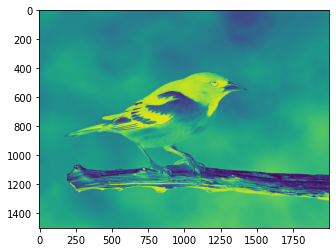

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

## 1.2 Thay đổi chất lượng ảnh với Power Law

C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_10492\3486324994.py:27: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


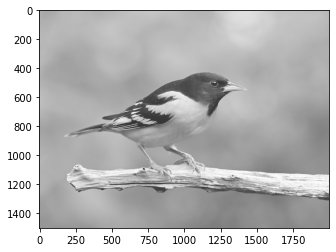

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#init gamma
gamma = 0.5

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#b3 is normalized
b3 = b1/b2

#b2 gamma correction exponent is computed
b2 = np.log(b3) * gamma

#gamma correction is computed
c = np.exp(b2) * 255.0

#c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

## 1.3 Thay đổi cường độ điểm ảnh với Log Transfomation

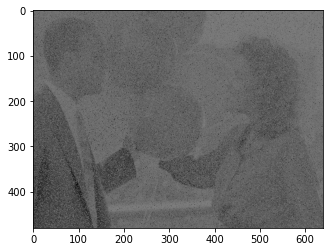

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#performing the log transformation
c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

#c1 is converted to type int
c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

## 1.4 Histogram equalization

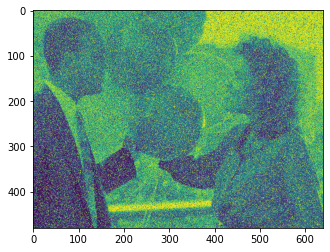

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = im1.flatten()

#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[b1]

# im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4)
plt.show()

## 1.5 Thay đổi ảnh với Contrast Stretching

0 255


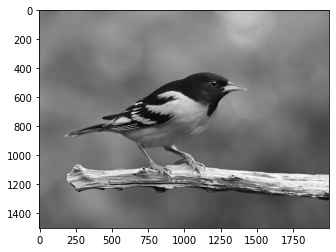

In [18]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - a)/(b - a)

#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

## 1.6 Biến đổi Fourier

#### 1.6.1 Biến đổi ảnh với Fast Fourier

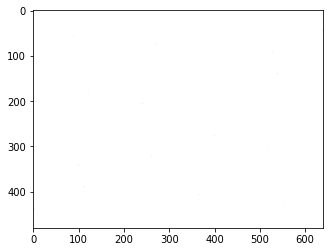

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)

#im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

#### 1.6.2 Lọc ảnh trong miền tần suất

##### Butterworth Lowpass Filter

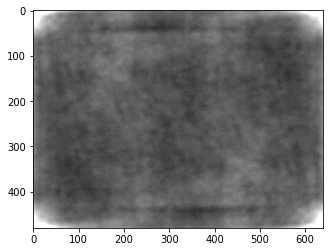

In [22]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t1)

#H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

##### Butterworth highpass Filter

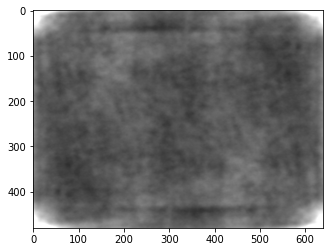

In [23]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t2)

#H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

## **<span style="color: red;">2. BÀI TẬP</span>**

    Bài 1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:

    Image inverse transformation

    Gamma-Correction

    Log Transformation

    Histogram equalization
    
    Contrast Stretching

    Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


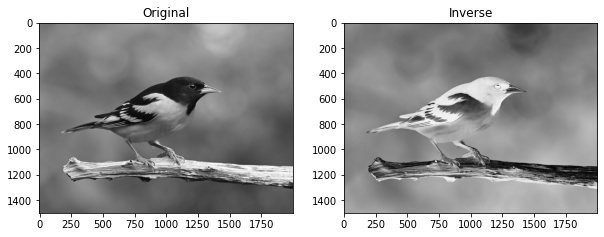


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


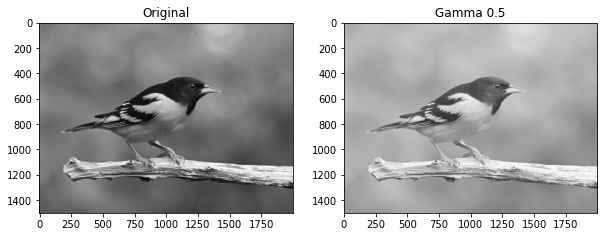


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\4119900581.py:25: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img_array))
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\4119900581.py:25: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img_array))
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\4119900581.py:26: RuntimeWarning: divide by zero encountered in log
  new_array = np.array(c * np.log(1 + img_array), dtype='uint8')
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\4119900581.py:26: RuntimeWarning: invalid value encountered in multiply
  new_array = np.array(c * np.log(1 + img_array), dtype='uint8')
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\4119900581.py:26: RuntimeWarning: invalid value encountered in cast
  new_array = np.array(c * np.log(1 + img_array), dtype='uint8')


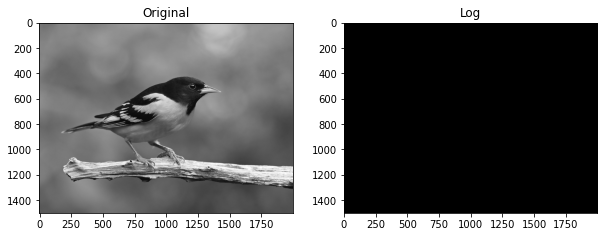


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


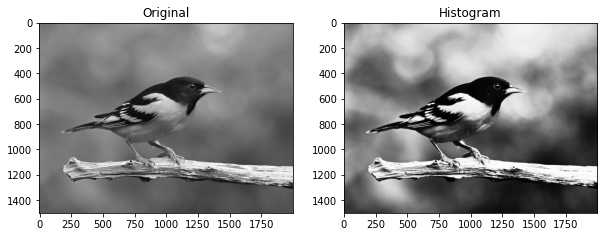


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


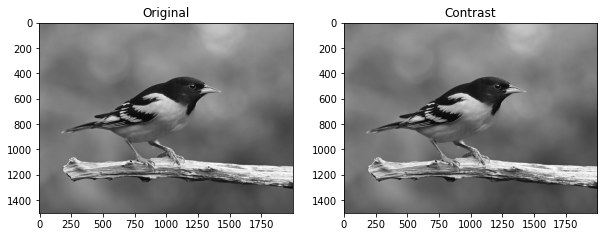


Menu:
I - Inverse
G - Gamma
L - Log
H - Histogram
C - Contrast
Q - Quit


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def process_image(choice):
    # Đọc ảnh
    img = Image.open('bird.png').convert('L')
    img_array = np.array(img)
    
    # Xử lý ảnh theo lựa chọn
    if choice == 'I':
        # Đảo ngược ảnh
        new_array = 255 - img_array
        title = 'Inverse'
    
    elif choice == 'G':
        # Gamma correction
        gamma = 0.5
        new_array = np.array(255 * (img_array / 255) ** gamma, dtype='uint8')
        title = f'Gamma {gamma}'
    
    elif choice == 'L':
        # Log transform
        c = 255 / np.log(1 + np.max(img_array))
        new_array = np.array(c * np.log(1 + img_array), dtype='uint8')
        title = 'Log'
    
    elif choice == 'H':
        # Histogram equalization
        hist, bins = np.histogram(img_array.flatten(), 256, [0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * float(255) / cdf[-1]
        new_array = np.array(cdf_normalized[img_array], dtype='uint8')
        title = 'Histogram'
    
    elif choice == 'C':
        # Contrast stretching
        a = np.min(img_array)
        b = np.max(img_array)
        new_array = np.array(((img_array - a)/(b - a)) * 255, dtype='uint8')
        title = 'Contrast'
    
    # Hiển thị ảnh
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original')
    plt.subplot(122)
    plt.imshow(new_array, cmap='gray')
    plt.title(title)
    plt.show()
    
    # Lưu ảnh
    output_dir = 'outputbai1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    result_img = Image.fromarray(new_array)
    result_img.save(f'{output_dir}/bird_{title.lower()}.png')

# Menu chính
while True:
    print("\nMenu:")
    print("I - Inverse")
    print("G - Gamma")
    print("L - Log")
    print("H - Histogram")
    print("C - Contrast")
    print("Q - Quit")
    
    choice = input("\nChọn chức năng (I/G/L/H/C/Q): ").upper()
    
    if choice == 'Q':
        break
    elif choice in ['I', 'G', 'L', 'H', 'C']:
        process_image(choice)
    else:
        print("Lựa chọn không hợp lệ!")

    Bài 2: Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:

    Fast Fourier

    Butterworth Lowpass Filter

    Butterworth Highpass Filter

    Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


Menu Fourier Transform:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit

Xử lý ảnh: ha-long-bay-in-vietnam.jpg


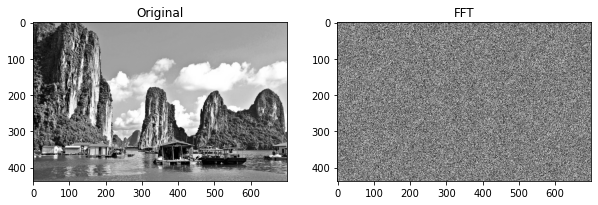


Xử lý ảnh: pagoda.jpg


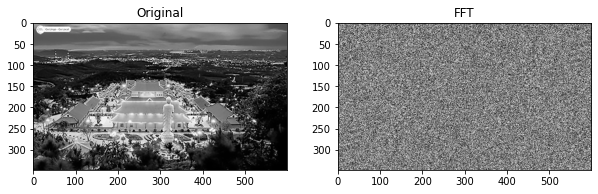


Xử lý ảnh: quang_ninh.jpg


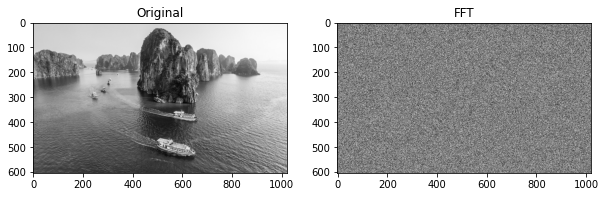


Menu Fourier Transform:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit

Xử lý ảnh: ha-long-bay-in-vietnam.jpg


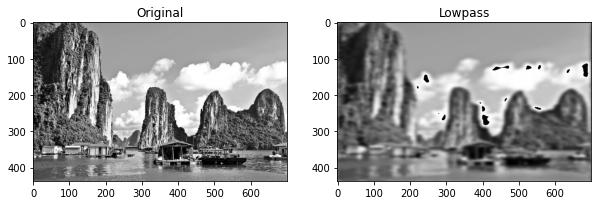


Xử lý ảnh: pagoda.jpg


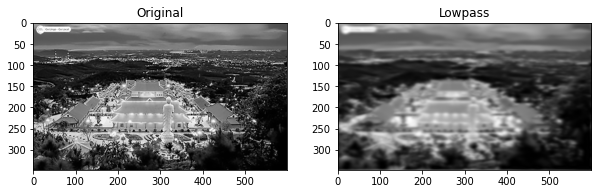


Xử lý ảnh: quang_ninh.jpg


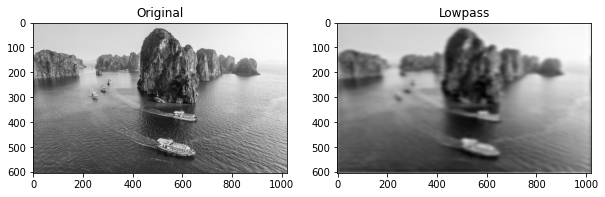


Menu Fourier Transform:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit

Xử lý ảnh: ha-long-bay-in-vietnam.jpg


C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\199386286.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i,j] = 1 / (1 + (d0/d)**4)


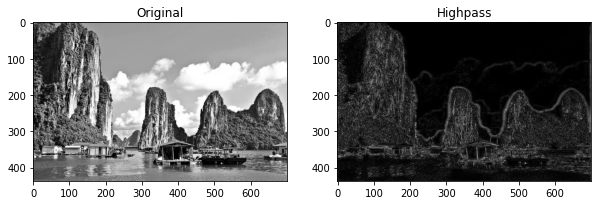


Xử lý ảnh: pagoda.jpg


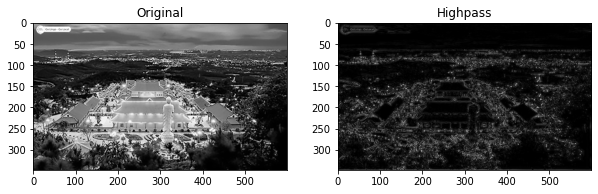


Xử lý ảnh: quang_ninh.jpg


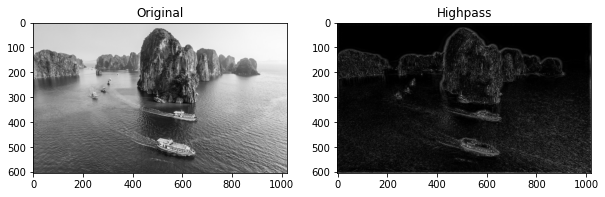


Menu Fourier Transform:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit


In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os

def process_fourier(choice, img_path):
    # Đọc ảnh
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    
    # Thực hiện FFT
    f = scipy.fftpack.fft2(img_array)
    fshift = scipy.fftpack.fftshift(f)
    
    if choice == 'F':
        # Fast Fourier Transform
        magnitude = np.abs(fshift)
        title = 'FFT'
        result = magnitude
        
    else:
        # Tạo filter
        rows, cols = img_array.shape
        crow, ccol = rows//2, cols//2
        d0 = 30  # Cutoff frequency
        
        # Tạo mask cho filter
        mask = np.zeros((rows, cols))
        for i in range(rows):
            for j in range(cols):
                d = np.sqrt((i-crow)**2 + (j-ccol)**2)
                if choice == 'L':
                    # Butterworth Lowpass
                    mask[i,j] = 1 / (1 + (d/d0)**4)
                else:
                    # Butterworth Highpass
                    mask[i,j] = 1 / (1 + (d0/d)**4)
        
        # Áp dụng filter
        fshift = fshift * mask
        f_ishift = scipy.fftpack.ifftshift(fshift)
        result = np.abs(scipy.fftpack.ifft2(f_ishift))
        title = 'Lowpass' if choice == 'L' else 'Highpass'
    
    # Chuyển về uint8
    result = np.uint8(result)
    
    # Hiển thị ảnh
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original')
    plt.subplot(122)
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.show()
    
    # Lưu ảnh
    output_dir = 'outputbai2'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    img_name = os.path.splitext(os.path.basename(img_path))[0]
    output_path = os.path.join(output_dir, f'{img_name}_{title.lower()}.png')
    Image.fromarray(result).save(output_path)

# Menu chính
while True:
    print("\nMenu Fourier Transform:")
    print("F - Fast Fourier Transform")
    print("L - Butterworth Lowpass Filter")
    print("H - Butterworth Highpass Filter")
    print("Q - Quit")
    
    choice = input("\nChọn chức năng (F/L/H/Q): ").upper()
    
    if choice == 'Q':
        break
    elif choice in ['F', 'L', 'H']:
        # Xử lý cho từng ảnh trong thư mục exercise
        for img_name in os.listdir('exercise'):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join('exercise', img_name)
                print(f"\nXử lý ảnh: {img_name}")
                process_fourier(choice, img_path)
    else:
        print("Lựa chọn không hợp lệ!")


    Bài 3: Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

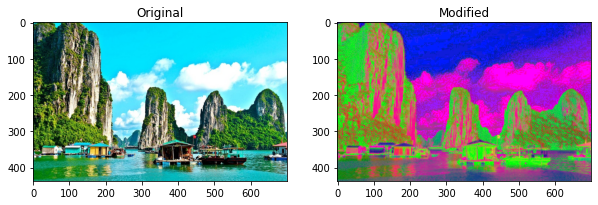

Đã xử lý và lưu ảnh: ha-long-bay-in-vietnam.jpg


C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\1915694253.py:17: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img_array))
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\1915694253.py:17: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img_array))
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\1915694253.py:18: RuntimeWarning: divide by zero encountered in log
  return np.array(c * np.log(1 + img_array), dtype='uint8'), 'Log'
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\1915694253.py:18: RuntimeWarning: invalid value encountered in multiply
  return np.array(c * np.log(1 + img_array), dtype='uint8'), 'Log'
C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_15784\1915694253.py:18: RuntimeWarning: invalid value encountered in cast
  return np.array(c * np.log(1 + img_array), dtype='uint8'), 'Log'


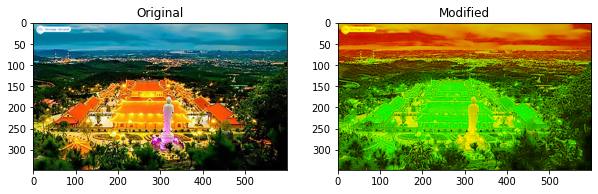

Đã xử lý và lưu ảnh: pagoda.jpg


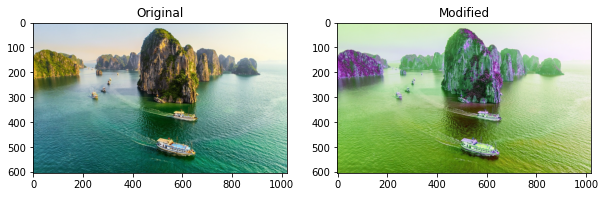

Đã xử lý và lưu ảnh: quang_ninh.jpg


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def random_transform(img_array):
    # Chọn ngẫu nhiên 1 trong 5 phép biến đổi từ bài 1
    choice = random.choice(['I', 'G', 'L', 'H', 'C'])
    
    if choice == 'I':
        return 255 - img_array, 'Inverse'
    elif choice == 'G':
        gamma = 0.5
        return np.array(255 * (img_array / 255) ** gamma, dtype='uint8'), f'Gamma_{gamma}'
    elif choice == 'L':
        c = 255 / np.log(1 + np.max(img_array))
        return np.array(c * np.log(1 + img_array), dtype='uint8'), 'Log'
    elif choice == 'H':
        hist, bins = np.histogram(img_array.flatten(), 256, [0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * float(255) / cdf[-1]
        return np.array(cdf_normalized[img_array], dtype='uint8'), 'Histogram'
    else:
        a, b = np.min(img_array), np.max(img_array)
        return np.array(((img_array - a)/(b - a)) * 255, dtype='uint8'), 'Contrast'

# Tạo thư mục output
output_dir = 'outputbai3'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Xử lý từng ảnh trong thư mục exercise
for img_name in os.listdir('exercise'):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Đọc ảnh
        img_path = os.path.join('exercise', img_name)
        img = Image.open(img_path)
        
        # Chuyển sang mảng numpy
        img_array = np.array(img)
        
        # Tách các kênh màu
        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
        
        # Hoán đổi ngẫu nhiên thứ tự RGB
        channels = [r, g, b]
        random.shuffle(channels)
        
        # Tạo ảnh mới với thứ tự màu đã hoán đổi
        new_img = np.dstack(channels)
        
        # Áp dụng biến đổi ngẫu nhiên cho mỗi kênh màu
        for i in range(3):
            new_img[:,:,i], transform_name = random_transform(new_img[:,:,i])
        
        # Hiển thị ảnh
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(img_array)
        plt.title('Original')
        plt.subplot(122)
        plt.imshow(new_img)
        plt.title('Modified')
        plt.show()
        
        # Lưu ảnh
        base_name = os.path.splitext(img_name)[0]
        output_path = os.path.join(output_dir, f'{base_name}_modified.png')
        Image.fromarray(new_img.astype('uint8')).save(output_path)
        print(f'Đã xử lý và lưu ảnh: {img_name}')


    Bài 4: Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.

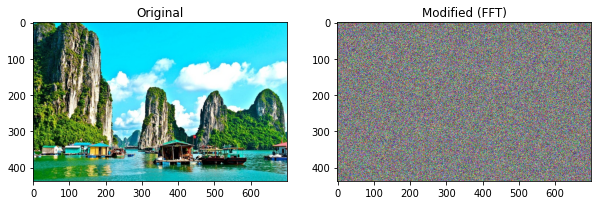

Đã xử lý và lưu ảnh: ha-long-bay-in-vietnam.jpg


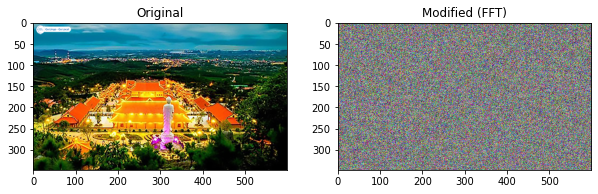

Đã xử lý và lưu ảnh: pagoda.jpg


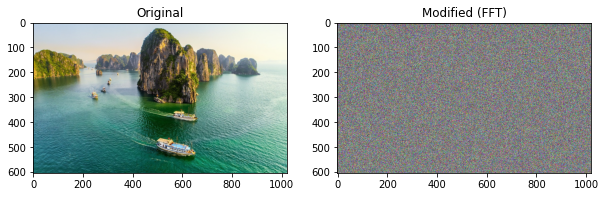

Đã xử lý và lưu ảnh: quang_ninh.jpg


In [4]:
from PIL import Image
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import minimum_filter, maximum_filter

def fourier_transform(img_array, choice):
    # Thực hiện FFT
    f = scipy.fftpack.fft2(img_array)
    fshift = scipy.fftpack.fftshift(f)
    
    if choice == 'F':
        # Fast Fourier Transform
        result = np.abs(fshift)
        return result, 'FFT'
    
    # Tạo filter
    rows, cols = img_array.shape
    crow, ccol = rows//2, cols//2
    d0 = 30
    
    # Tạo mask
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i-crow)**2 + (j-ccol)**2)
            if choice == 'L':
                # Butterworth Lowpass
                mask[i,j] = 1 / (1 + (d/d0)**4)
            else:
                # Butterworth Highpass
                mask[i,j] = 1 / (1 + (d0/d)**4)
    
    # Áp dụng filter
    fshift = fshift * mask
    f_ishift = scipy.fftpack.ifftshift(fshift)
    result = np.abs(scipy.fftpack.ifft2(f_ishift))
    
    # Áp dụng min/max filter
    if choice == 'L':
        result = minimum_filter(result, size=3)
        title = 'Lowpass_Min'
    else:
        result = maximum_filter(result, size=3)
        title = 'Highpass_Max'
    
    return result, title

# Tạo thư mục output
output_dir = 'outputbai4'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Xử lý từng ảnh trong thư mục exercise
for img_name in os.listdir('exercise'):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Đọc ảnh
        img_path = os.path.join('exercise', img_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Tách và hoán đổi kênh màu
        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
        channels = [r, g, b]
        random.shuffle(channels)
        
        # Chọn ngẫu nhiên phép biến đổi
        choice = random.choice(['F', 'L', 'H'])
        
        # Xử lý từng kênh màu
        new_channels = []
        for channel in channels:
            result, transform_name = fourier_transform(channel, choice)
            new_channels.append(np.uint8(result))
        
        # Gộp các kênh màu
        new_img = np.dstack(new_channels)
        
        # Hiển thị ảnh
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(img_array)
        plt.title('Original')
        plt.subplot(122)
        plt.imshow(new_img)
        plt.title(f'Modified ({transform_name})')
        plt.show()
        
        # Lưu ảnh
        base_name = os.path.splitext(img_name)[0]
        output_path = os.path.join(output_dir, f'{base_name}_{transform_name.lower()}.png')
        Image.fromarray(new_img).save(output_path)
        print(f'Đã xử lý và lưu ảnh: {img_name}')